<a href="https://colab.research.google.com/github/Samir-atra/BDSD_Minor_Project/blob/main/MediaPipe_Stuff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Download and install packages
!python -m pip install mediapipe
!wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task
!wget -q -O image.png https://storage.googleapis.com/mediapipe-assets/business-person.png

# Imports
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import csv

In [28]:
# Visualization


def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in face_landmarks
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp.solutions.drawing_styles
          .get_default_face_mesh_iris_connections_style())

  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()


In [29]:
# download and upload images
# download
# img = cv2.imread("images.jpg")
# cv2_imshow(img)

#upload
# from google.colab import files
# uploaded = files.upload()

# for filename in uploaded:
#   content = uploaded[filename]
#   with open(filename, 'wb') as f:
#     f.write(content)

# if len(uploaded.keys()):
#   IMAGE_FILE = next(iter(uploaded))
#   print('Uploaded file:', IMAGE_FILE)

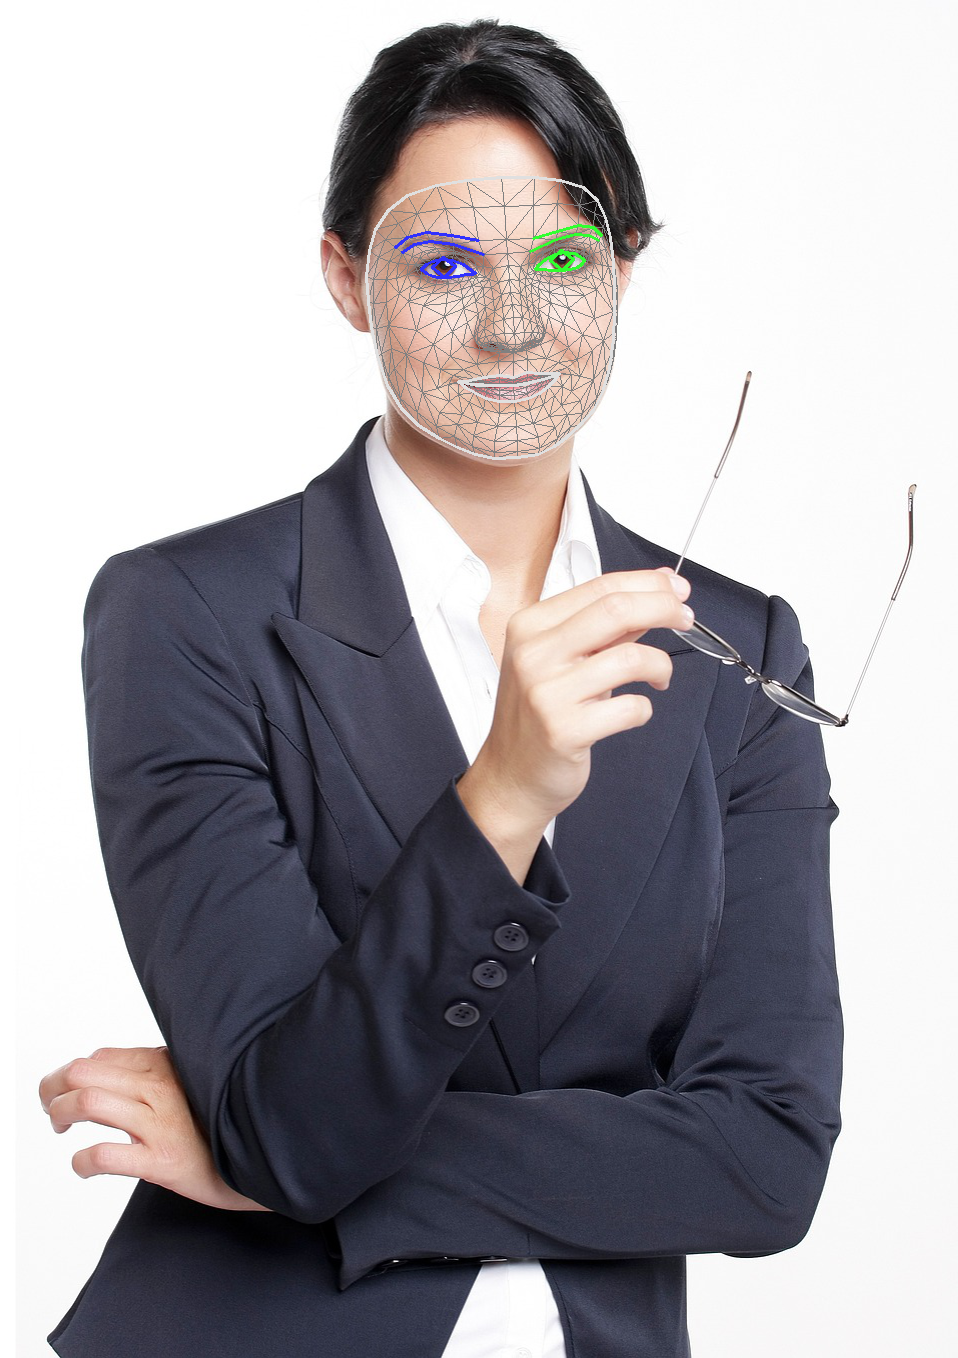

In [30]:
#inferencing and visualizing

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='face_landmarker_v2_with_blendshapes.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("image.png")

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)
# print(detection_result.facial_transformation_matrixes)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

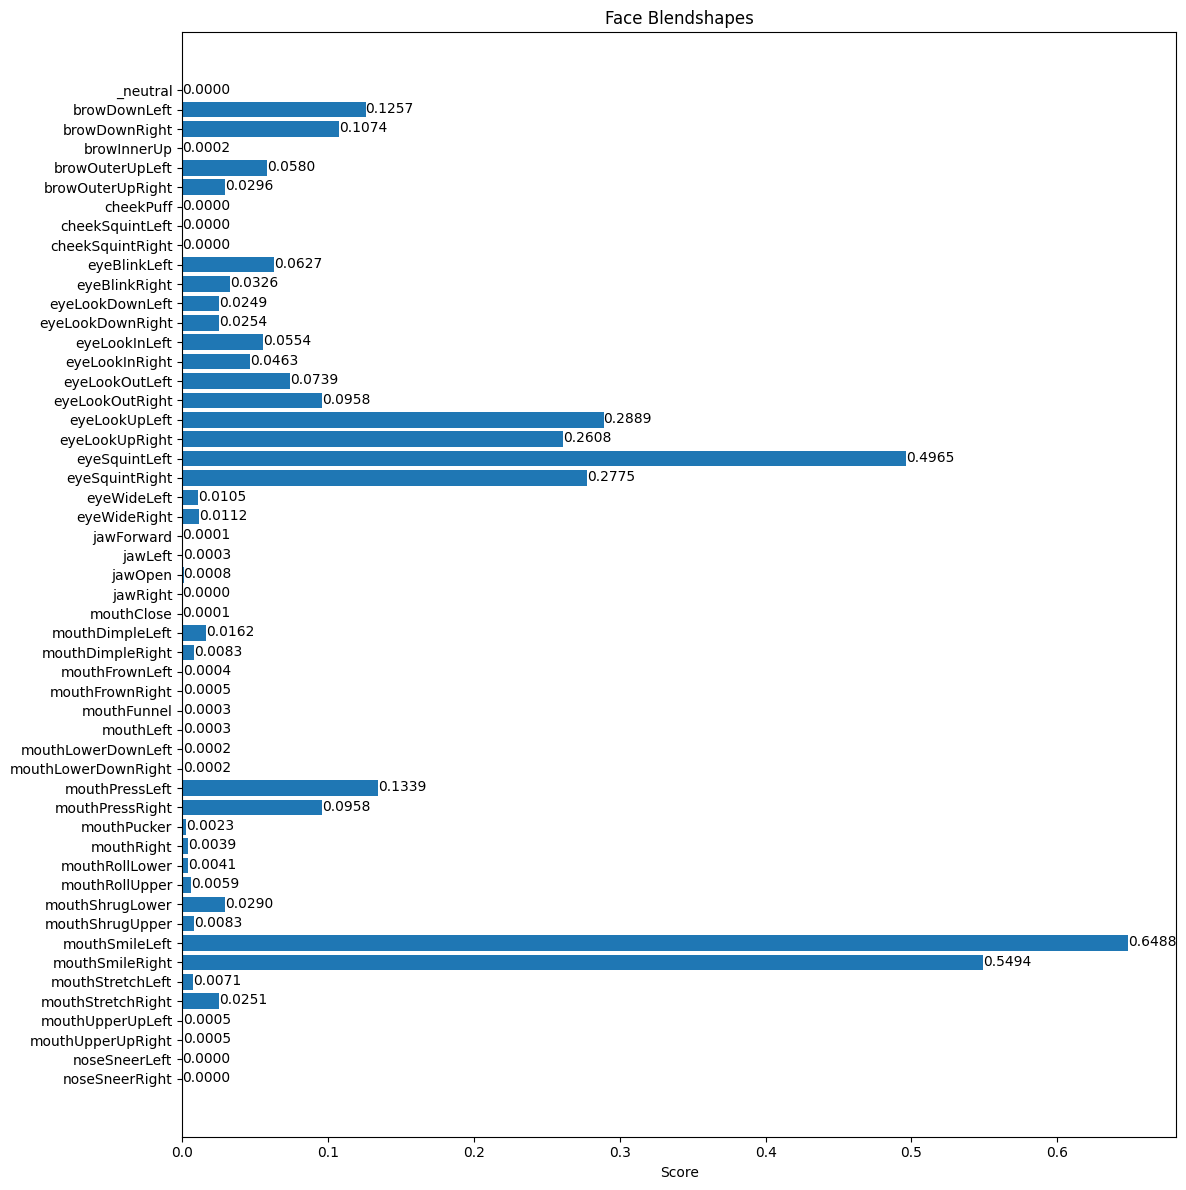

[Category(index=0, score=2.72534475698194e-06, display_name='', category_name='_neutral'), Category(index=1, score=0.1256559193134308, display_name='', category_name='browDownLeft'), Category(index=2, score=0.10741737484931946, display_name='', category_name='browDownRight'), Category(index=3, score=0.0001509089197497815, display_name='', category_name='browInnerUp'), Category(index=4, score=0.05803173407912254, display_name='', category_name='browOuterUpLeft'), Category(index=5, score=0.029591243714094162, display_name='', category_name='browOuterUpRight'), Category(index=6, score=3.763052154681645e-05, display_name='', category_name='cheekPuff'), Category(index=7, score=2.0550255896978342e-07, display_name='', category_name='cheekSquintLeft'), Category(index=8, score=2.673677101938665e-07, display_name='', category_name='cheekSquintRight'), Category(index=9, score=0.06272834539413452, display_name='', category_name='eyeBlinkLeft'), Category(index=10, score=0.03263695165514946, displa

In [31]:
# plot bar graphs

plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])
print(detection_result.face_blendshapes[0])

emotion =  5


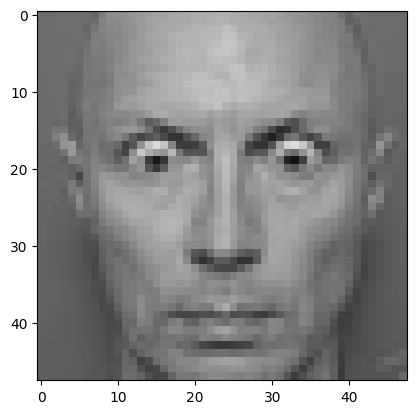

emotion =  5


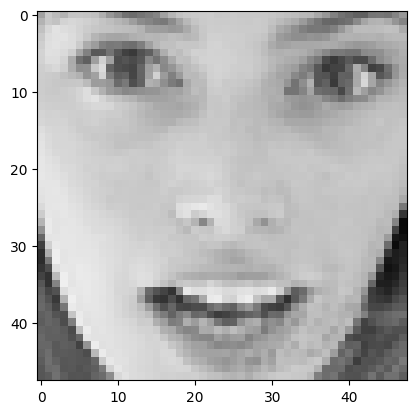

emotion =  5


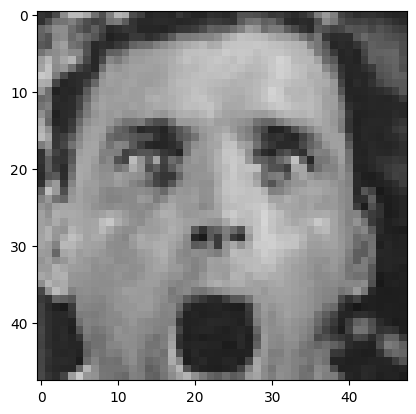

emotion =  5


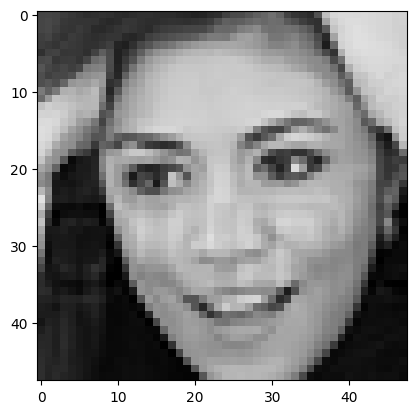

emotion =  5


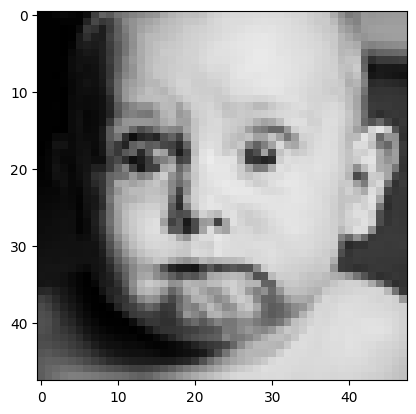

emotion =  5


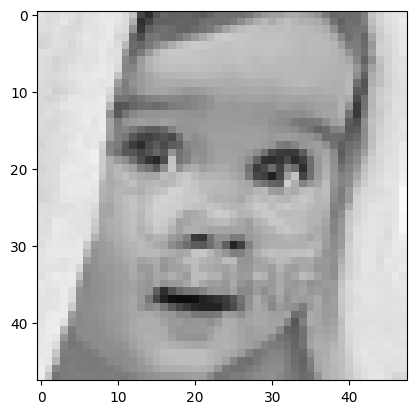

emotion =  5


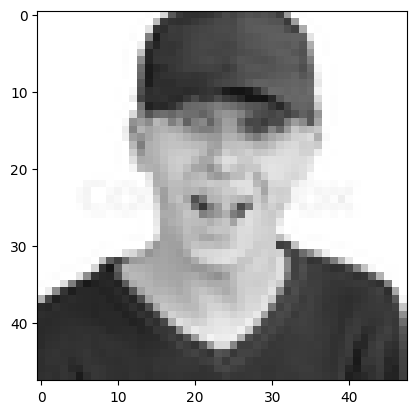

emotion =  5


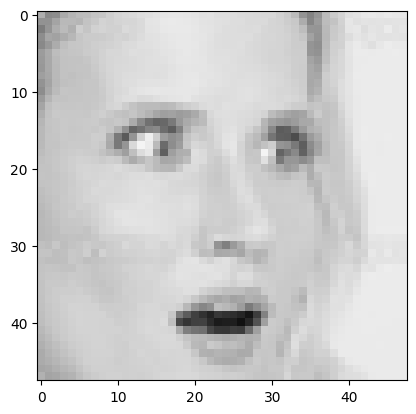

emotion =  5


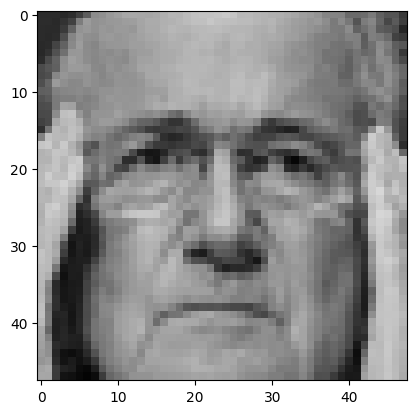

emotion =  5


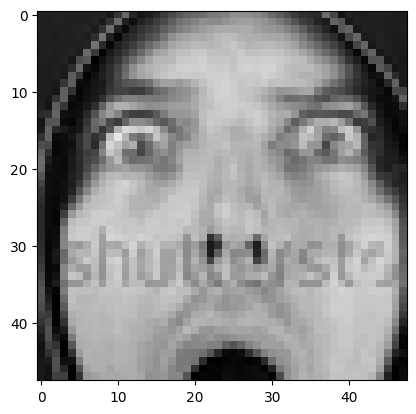

emotion =  5


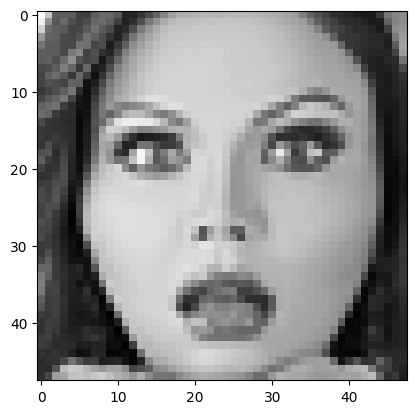

emotion =  5


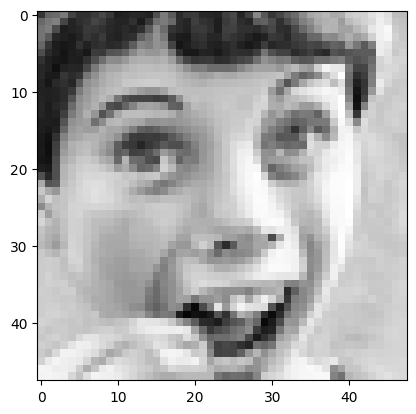

emotion =  5


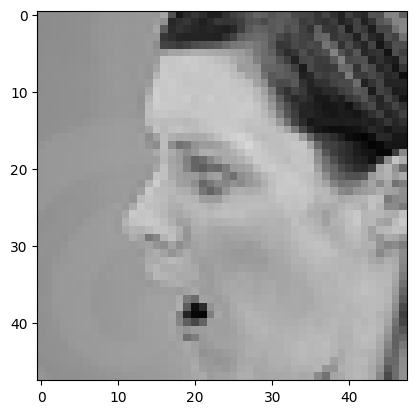

emotion =  5


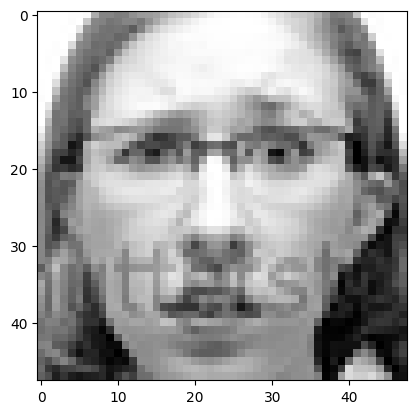

emotion =  5


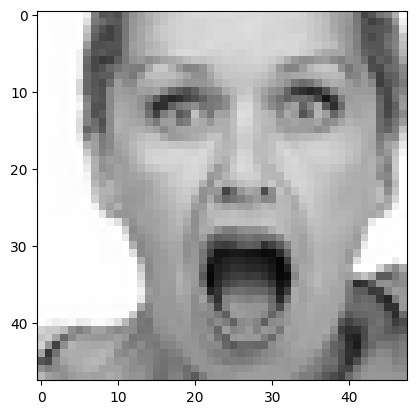

emotion =  5


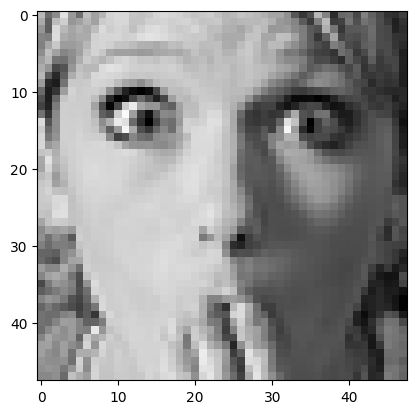

emotion =  5


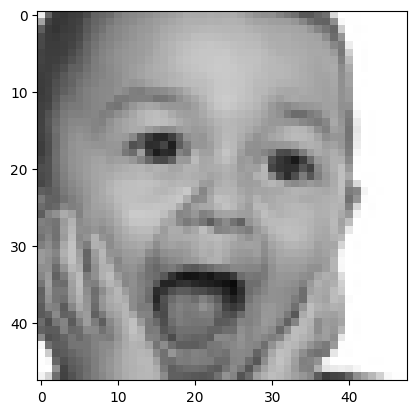

emotion =  5


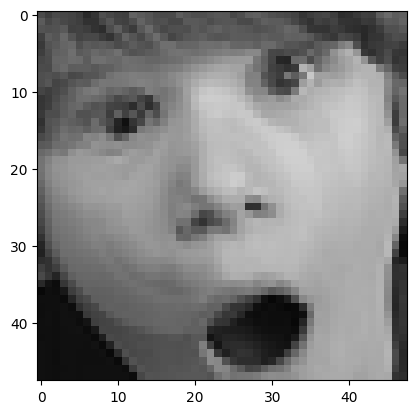

emotion =  5


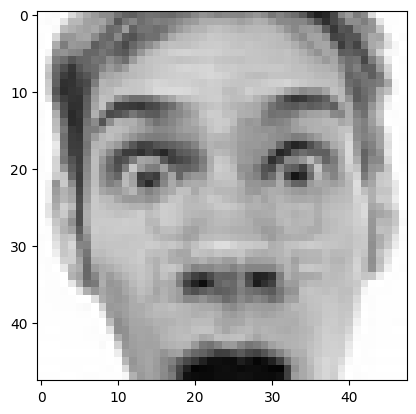

emotion =  5


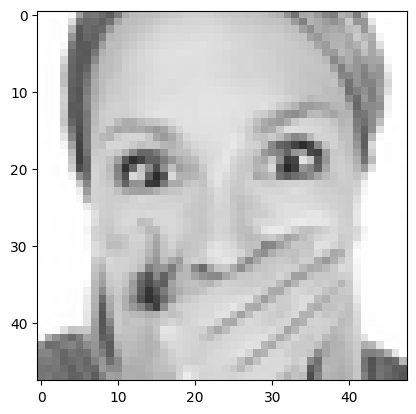

emotion =  5


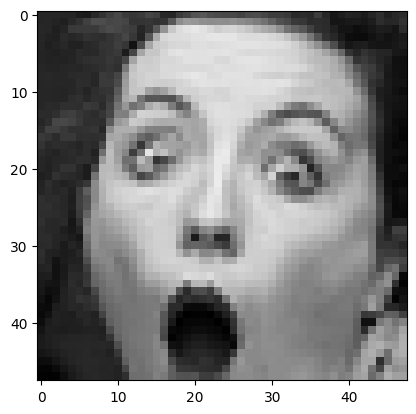

emotion =  5


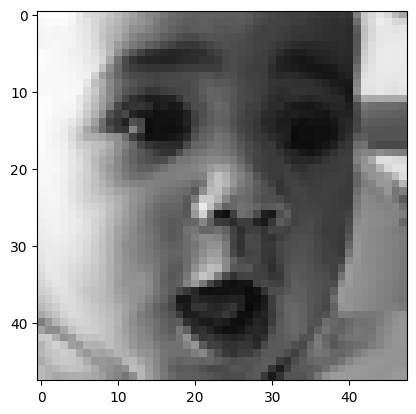

emotion =  5


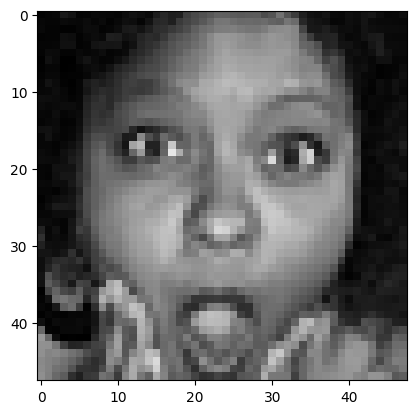

emotion =  5


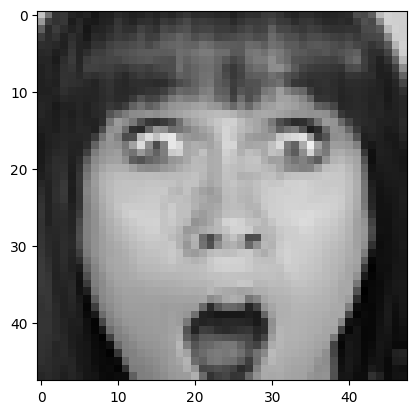

emotion =  5


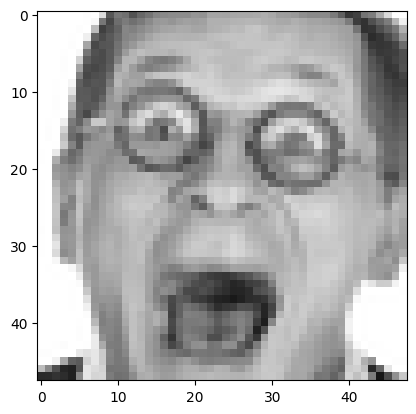

emotion =  5


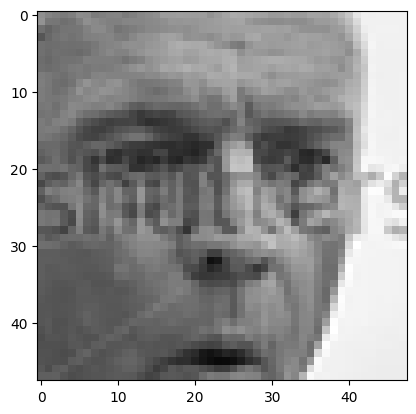

emotion =  5


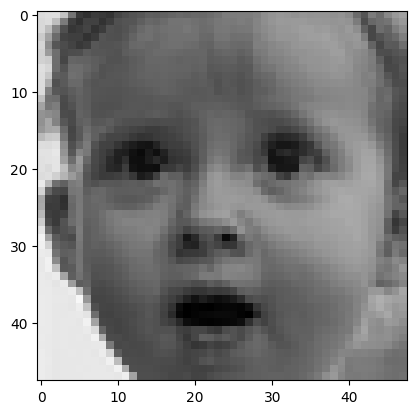

emotion =  5


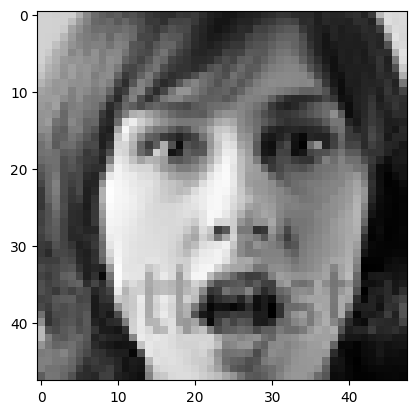

emotion =  5


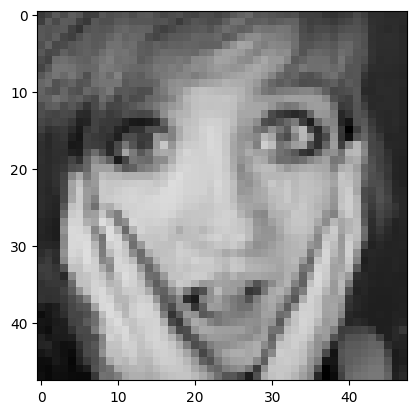

emotion =  5


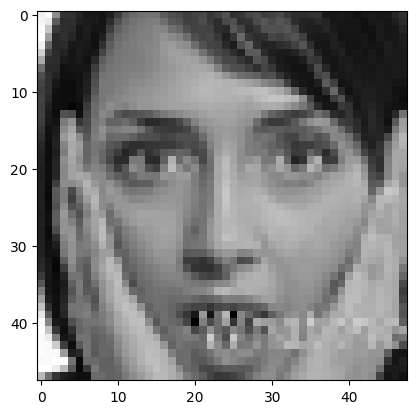

emotion =  5


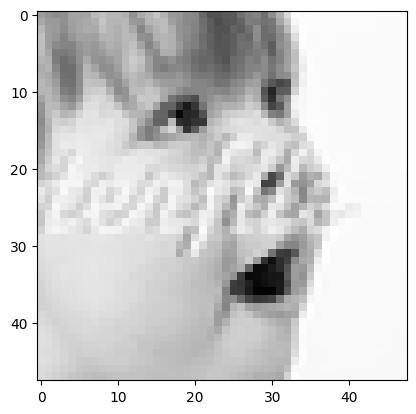

emotion =  5


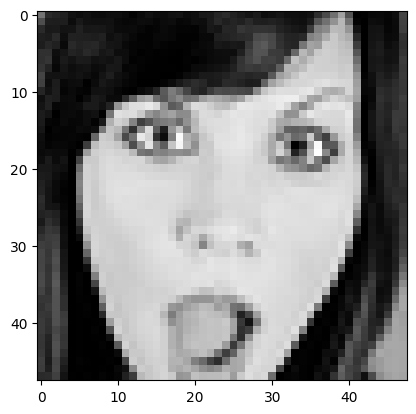

emotion =  5


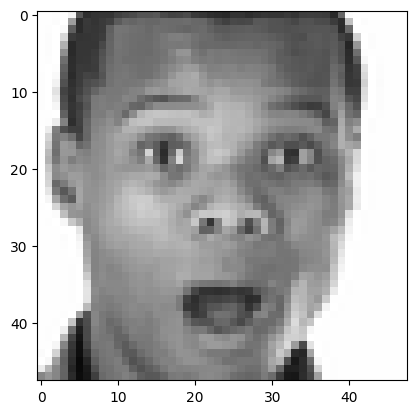

emotion =  5


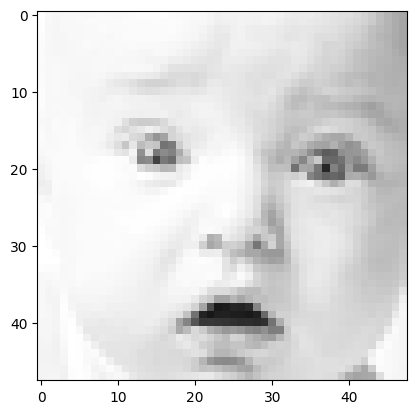

emotion =  5


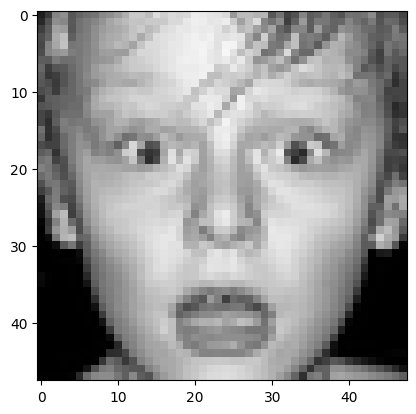

emotion =  5


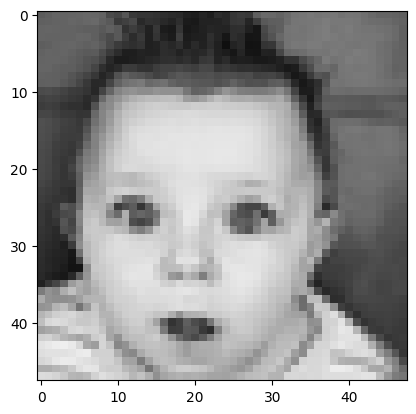

emotion =  5


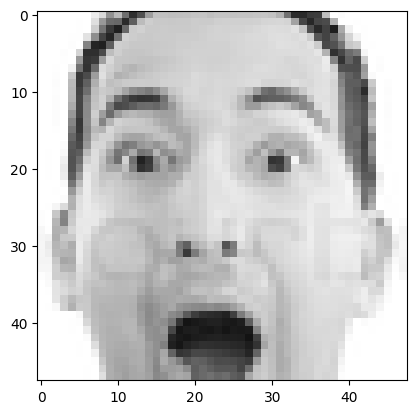

emotion =  5


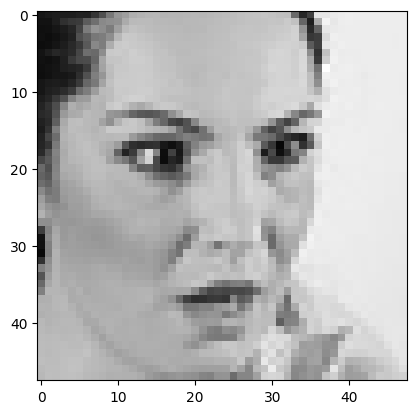

emotion =  5


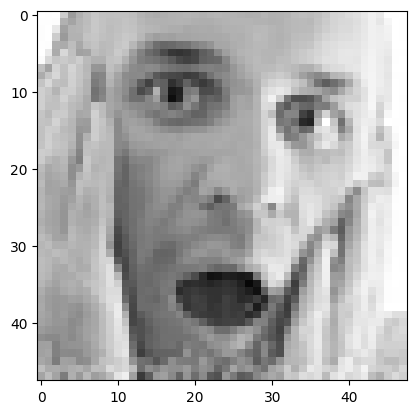

emotion =  5


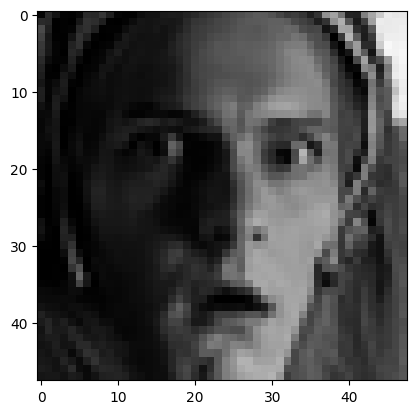

emotion =  5


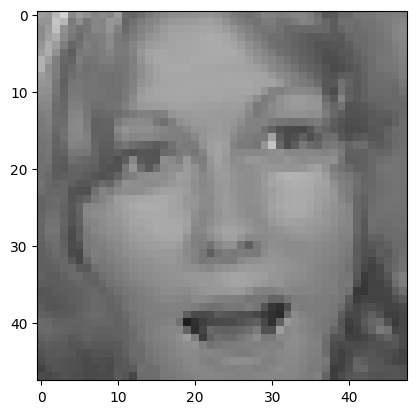

emotion =  5


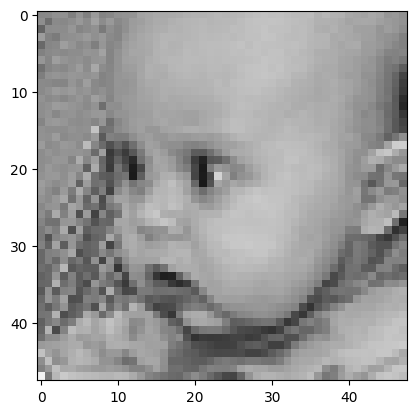

emotion =  5


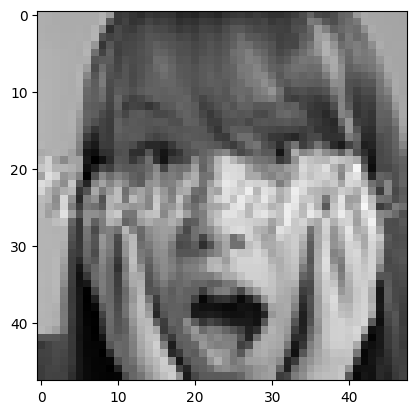

emotion =  5


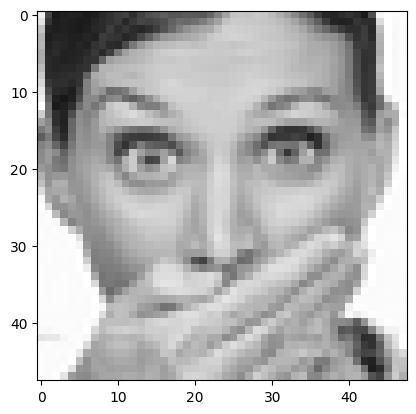

emotion =  5


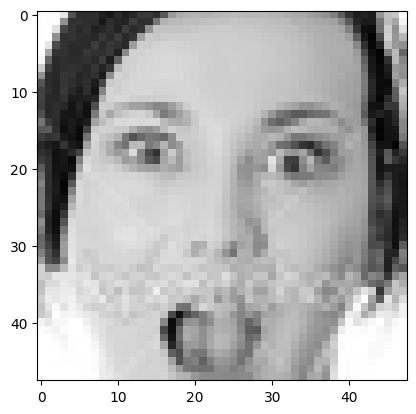

emotion =  5


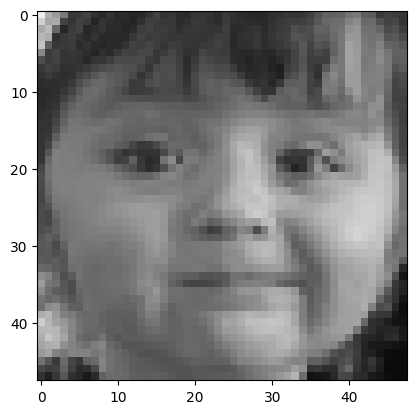

emotion =  5


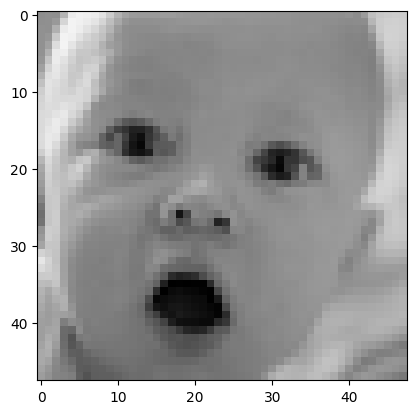

emotion =  5


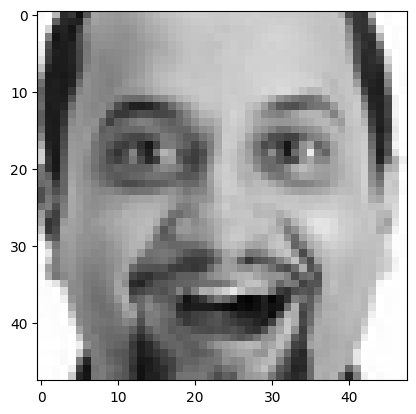

emotion =  5


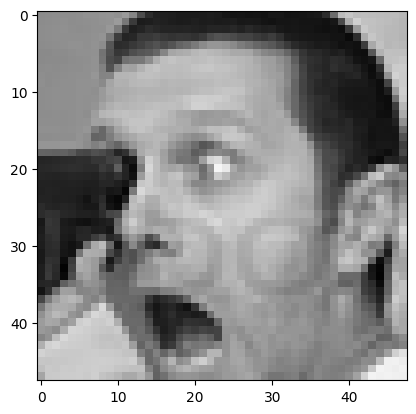

emotion =  5


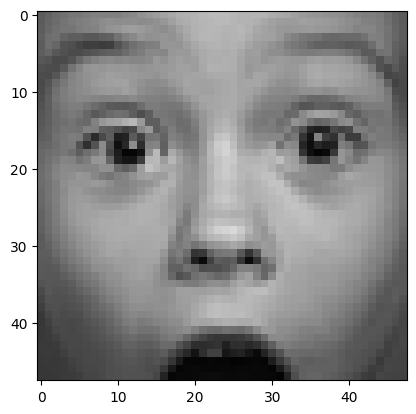

emotion =  5


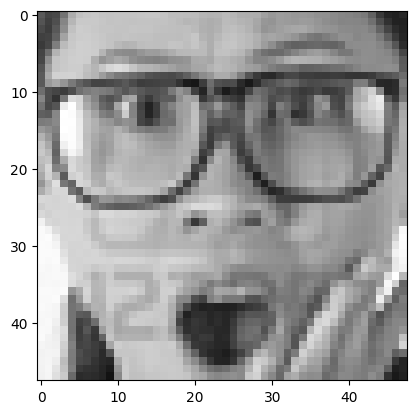

emotion =  5


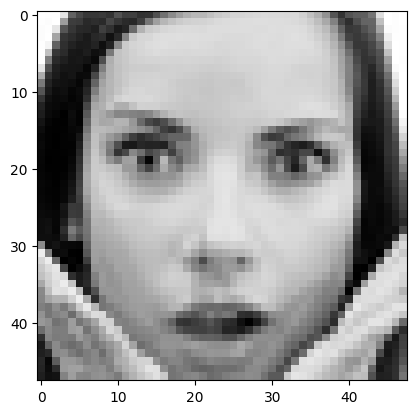

emotion =  5


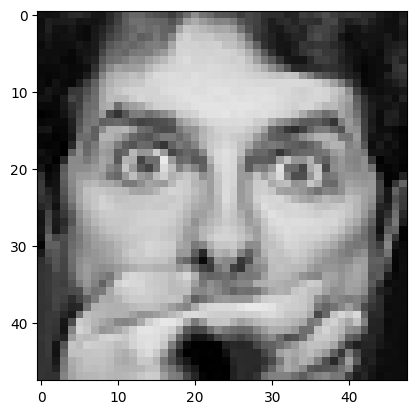

emotion =  5


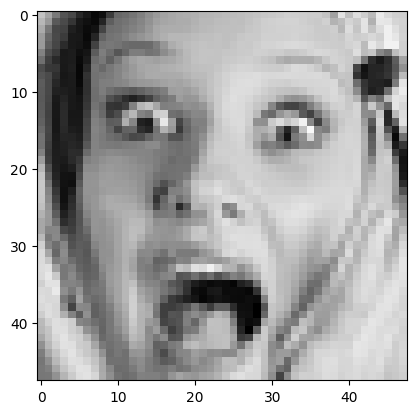

emotion =  5


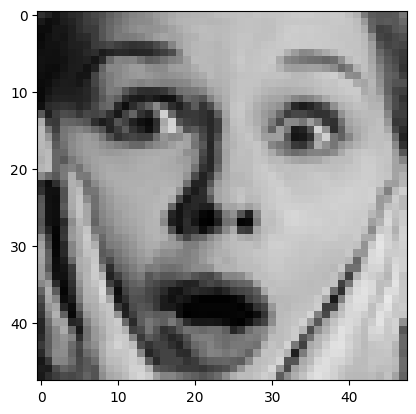

emotion =  5


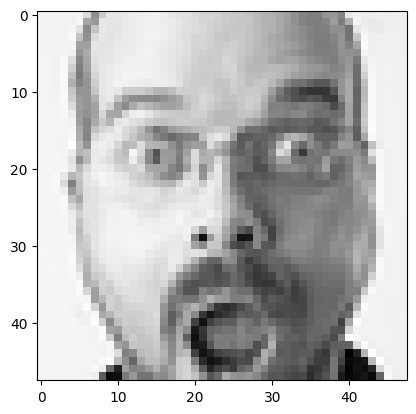

emotion =  5


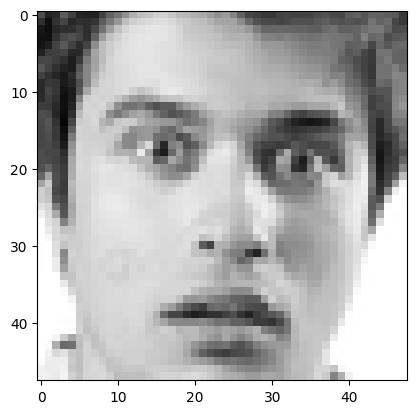

emotion =  5


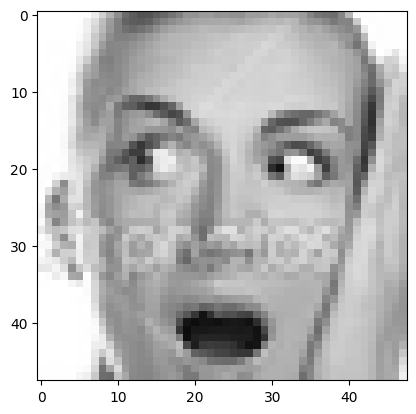

emotion =  5


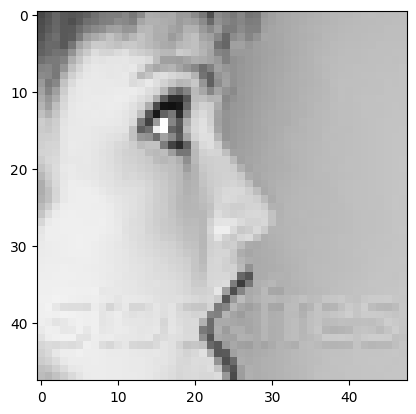

emotion =  5


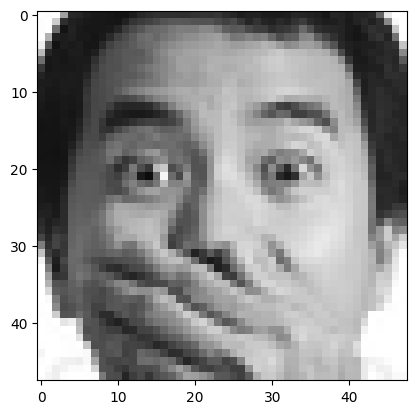

emotion =  5


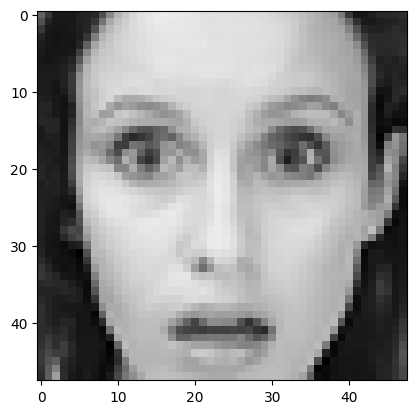

emotion =  5


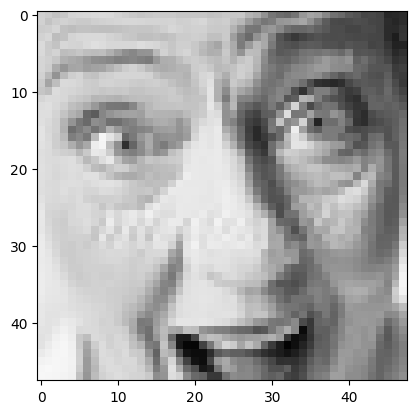

emotion =  5


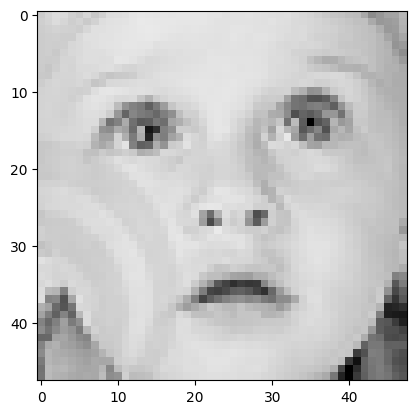

emotion =  5


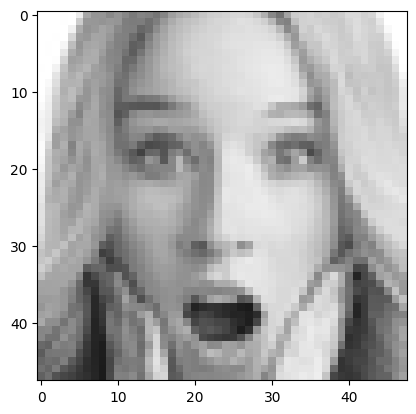

emotion =  5


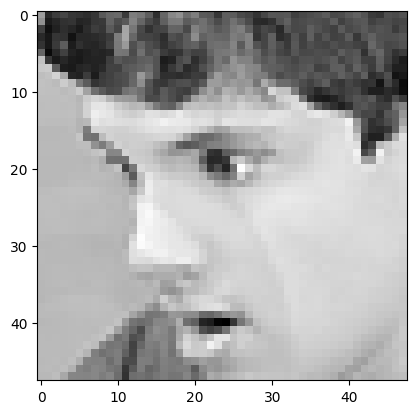

emotion =  5


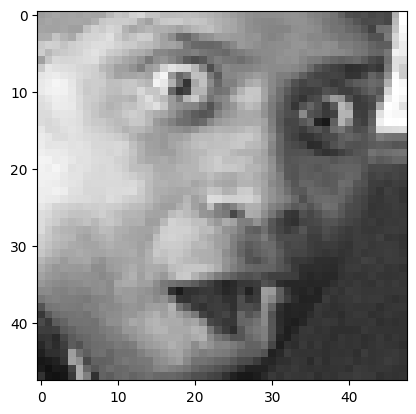

emotion =  5


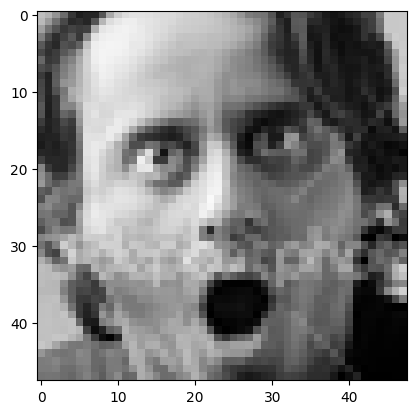

emotion =  5


KeyboardInterrupt: 

In [45]:
# Processing the dataset

Training_set = []
validation_set = []
test_set = []
categories_count = {"0":0, "1":0, "2":0, "3":0, "4":0, "5":0, "6":0}
skipped = {"0":0, "1":0, "2":0, "3":0, "4":0, "5":0, "6":0}
with open("fer2013.csv", mode= "r") as data:
  csvFile = csv.reader(data)
  for lines in csvFile:
    if lines[2] == "Training":
      Training_set.append(lines)
  # iterate over the training dataset
  for i in range(len(Training_set)):
    # print(categories_count[Training_set[i][0]])
    categories_count[Training_set[i][0]] = categories_count[Training_set[i][0]] + 1
    image = np.array(Training_set[i][1].split(' ')).reshape(48, 48, 1).astype(np.uint8)
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    rgb_frame = mp.Image(image_format=mp.ImageFormat.SRGB,data=image)
    detection_result = detector.detect(rgb_frame)
    print("emotion = ", Training_set[i][0])
    img = plt.imshow(image)
    plt.show()
    # Skip the image if not understood by mediapipe
    if detection_result.face_blendshapes == []:
      skipped[Training_set[i][0]] = skipped[Training_set[i][0]] + 1
      continue
  print("This is categories count", categories_count)
  print("This is skipped", skipped)

    # plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])
    # annotated_image = draw_landmarks_on_image(rgb_frame.numpy_view(), detection_result)
    # cv2_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

  # for lines in csvFile:
  #   if lines[2] == "PublicTest":
  #     validation_set.append(lines)
  # for lines in csvFile:
  #   if lines[2] == "PrivateTest":
  #     test_set.append(lines)

# csvfile = "training_set.csv"
# fields = ["emotion", "pixels", "Usage"]
# with open(csvfile, mode="a") as first:
#   csvwriter = csv.writer(first)
#   csvwriter.writerow(fields)
#   csvwriter.writerows(Training_set)

# csvfile2 = "validation_set.csv"
# fields = ["emotion", "pixels", "Usage"]
# with open(csvfile2, mode="a") as second:
#   csvwriter = csv.writer(second)
#   csvwriter.writerow(fields)
#   csvwriter.writerows(validation_set)

# csvfile3 = "test_set.csv"
# fields = ["emotion", "pixels", "Usage"]
# with open(csvfile3, mode="a") as third:
#   csvwriter = csv.writer(third)
#   csvwriter.writerow(fields)
#   csvwriter.writerows(test_set)

In [32]:
# classification

if detection_result.face_blendshapes[0][44].score > 0.5 and detection_result.face_blendshapes[0][45].score > 0.5 :
  print("Happy")
elif detection_result.face_blendshapes[0][42].score > 0.5:
  print("Sad")


Happy
